# Data Manipulation with pandas

👋 Welcome to your new **workspace**! Here, you can experiment with the data you used in [Data Manipulation with pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas) and practice your newly learned skills with some challenges. You can find out more about DataCamp Workspace [here](https://workspace-docs.datacamp.com/).

On average, we expect users to take approximately **30 minutes** to complete the content in this workspace. However, you are free to experiment and practice in it as long as you would like!

## 1. Get Started
Below is a code cell. It is used to execute Python code. The code below imports three packages you used in Data Manipulation with pandas: pandas, NumPy, and Matplotlib. The code also imports data you used in the course as DataFrames using the pandas [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

🏃**To execute the code, click inside the cell to select it and click "Run" or the ► icon. You can also use Shift-Enter to run a selected cell.**

In [46]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the four datasets
avocados = pd.read_csv("datasets/avocado.csv")
# homelessness = pd.read_csv("datasets/homelessness.csv")
temperatures = pd.read_csv("datasets/temperatures.csv")
sales = pd.read_csv("datasets/sales_subset.csv")

# Print the first DataFrame


# Multiple grouped summaries
Earlier in this chapter, you saw that the `.agg()` method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as `np`, has many different summary statistics functions, including: `np.min`, `np.max`, `np.mean`, and `np.median`.

sales is available and pandas is imported as pd.

# Instructions
+ Import `numpy` with the alias np.
+ Get the min, max, mean, and median of `weekly_sales` for each store type using `.groupby()` and `.agg()`. Store this as `sales_stats`. Make sure to use `numpy` functions!
+ Get the min, max, mean, and median of `unemployment` and `fuel_price_usd_per_l` for each store type. Store this as `unemp_fuel_stats`.

## Setting and removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In this chapter, you'll be exploring `temperatures`, a DataFrame of average temperatures in cities around the world. `pandas` is loaded as `pd`.

**Instructions**
+ Look at `temperatures`.
+ Set the index of `temperatures` to `"city"`, assigning to `temperatures_ind`.
+ Look at `temperatures_ind`. How is it different from `temperatures`?
+ Reset the index of `temperatures_ind`, keeping its contents.
+ Reset the index of `temperatures_ind`, dropping its contents.

In [47]:
# Look at temperatures
print(temperatures)

# Index temperatures by city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]
         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidj

# Subsetting with .loc[]
The killer feature for indexes is `.loc[]`: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using `.loc[]` can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

`pandas` is loaded as `pd`. `temperatures` and `temperatures_ind` are available; the latter is indexed by `city`.

**Instructions**
+ Create a list called `cities` that contains "Moscow" and "Saint Petersburg".
+ Use `[]` subsetting to filter `temperatures` for rows where the `city` column takes a value in the `cities` list.
+ Use `.loc[]` subsetting to filter `temperatures_ind` for rows where the city is in the `cities` list.

In [48]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

## Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

`pandas` is loaded as `pd`. `temperatures` is available.

**instructions**
+ Set the index of `temperatures` to the `"country" `and `"city"` columns, and assign this to `temperatures_ind`.
+ Specify two country/city pairs to keep: `"Brazil"`/`"Rio De Janeiro"` and `"Pakistan"`/`"Lahore"`, assigning to `rows_to_keep`.
+ Print and subset `temperatures_ind` for `rows_to_keep` using `.loc[]`.

In [49]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country","city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil","Rio De Janeiro"),("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])   

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


# Sorting by index values
Previously, you changed the order of the rows in a DataFrame by calling `.sort_values()`. It's also useful to be able to sort by elements in the index. For this, you need to use `.sort_index()`.

`pandas` is loaded as `pd`. `temperatures_ind` has a multi-level index of `country` and `city`, and is available.

**Instructions**
+ Sort `temperatures_ind` by the index values.
+ Sort `temperatures_ind` by the index values at the `"city"` level.
+ Sort `temperatures_ind` by ascending country then descending city.

In [50]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending = [True, False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

## Slicing index values
Slicing lets you select consecutive elements of an object using `first:last` syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the `.loc[]` method.

Compared to slicing lists, there are a few things to remember.

You can only slice an index if the index is sorted (using `.sort_index()`).
To slice at the outer level, `first` and `last` can be strings.
To slice at inner levels, `first` and `last` should be tuples.
If you pass a single slice to `.loc[]`, it will slice the rows.
`pandas` is loaded as `pd`. `temperatures_ind` has country and city in the index, and is available.

**Instructions**
+ Sort the index of `temperatures_ind`.
+ Use slicing with `.loc[]` to get these subsets:
  + from Pakistan to Russia.
  + from Lahore to Moscow. (This will return nonsense.)
  + from Pakistan, Lahore to Russia, Moscow.

In [51]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"].head())

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"].head())

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")].head())

                     Unnamed: 0        date  avg_temp_c
country  city                                          
Pakistan Faisalabad        4785  2000-01-01      12.792
         Faisalabad        4786  2000-02-01      14.339
         Faisalabad        4787  2000-03-01      20.309
         Faisalabad        4788  2000-04-01      29.072
         Faisalabad        4789  2000-05-01      34.845
                Unnamed: 0        date  avg_temp_c
country city                                      
Mexico  Mexico       10230  2000-01-01      12.694
        Mexico       10231  2000-02-01      14.677
        Mexico       10232  2000-03-01      17.376
        Mexico       10233  2000-04-01      18.294
        Mexico       10234  2000-05-01      18.562
                 Unnamed: 0        date  avg_temp_c
country  city                                      
Pakistan Lahore        8415  2000-01-01      12.792
         Lahore        8416  2000-02-01      14.339
         Lahore        8417  2000-03-01    

## Slicing in both directions
You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to `.loc[]`, you can subset by rows and columns in one go.

`pandas` is loaded as `pd`. `temperatures_srt` is indexed by country and city, has a sorted index, and is available.

**Instructions**
+ Use `.loc[]` slicing to subset rows from India, Hyderabad to Iraq, Baghdad.
+ Use `.loc[]` slicing to subset columns from `date` to `avg_temp_c`.
+ Slice in both directions at once from Hyderabad to Baghdad, and `date` to `avg_temp_c`.

In [52]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India", "Hyderabad" ):("Iraq", "Baghdad")])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

# Subset in both directions at once
print(temperatures_srt.loc[("India", "Hyderabad" ):("Iraq", "Baghdad"),"date":"avg_temp_c"])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kab

## Slicing time series
Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the `date` column to the index, then use `.loc[]` to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, `"yyyy-mm-dd"` for year-month-day, `"yyyy-mm"` for year-month, and `"yyyy"` for year.

Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators, such as `&`. To do so in one line of code, you'll need to add parentheses `()` around each condition.

`pandas` is loaded as `pd` and `temperatures`, with no index, is available.

**Instructions**
+ Use Boolean conditions, not `.isin()` or `.loc[]`, and the full date `"yyyy-mm-dd"`, to subset `temperatures` for rows in 2010 and 2011 and print the results.
+ Set the index of `temperatures` to the `date` column and sort it.
+ Use `.loc[]` to subset `temperatures_ind` for rows in 2010 and 2011.
+ Use `.loc[]` to subset `temperatures_ind` for rows from Aug 2010 to Feb 2011.

In [53]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]
            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-0

## Subsetting by row/column number
The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using `.iloc[]`, and like `.loc[]`, it can take two arguments to let you subset by rows and columns.

`pandas` is loaded as `pd`. `temperatures` (without an index) is available.

**Instructions**
Use `.iloc[]` on `temperatures` to take subsets.

+ Get the 23rd row, 2nd column (index positions 22 and 1).
+ Get the first 5 rows (index positions 0 to 5).
+ Get all rows, columns 3 and 4 (index positions 2 to 4).
+ Get the first 5 rows, columns 3 and 4.

In [54]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:5])

# Use slicing in both directions at once
print(temperatures.iloc[:5,2:5])

2001-11-01
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
          city        country  avg_temp_c
0      Abidjan  Côte D'Ivoire      27.293
1      Abidjan  Côte D'Ivoire      27.685
2      Abidjan  Côte D'Ivoire      29.061
3      Abidjan  Côte D'Ivoire      28.162
4      Abidjan  Côte D'Ivoire      27.547
...        ...            ...         ...
16495     Xian          China      18.979
16496     Xian          China      23.522
16497     Xian          China      25.251
16498     Xian          China      24.528
16499     Xian          China         NaN

[16500 rows x 3 columns]
      city        country  avg_temp_c
0  Abidjan  Côte D'Ivoire      27.293
1  Abidjan 

## Pivot temperature by city and year
It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form `dataframe["column"].dt.component`. For example, the month component is `dataframe["column"].dt.month`, and the year component is `dataframe["column"].dt.year`.

Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.

`pandas` is loaded as `pd`. `temperatures` is available.

**Instructions**
+ Add a `year` column to `temperatures`, from the `year` component of the `date` column.
+ Make a pivot table of the `avg_temp_c` column, with `country` and `city` as rows, and `year` as columns. Assign to `temp_by_country_city_vs_year`, and look at the result.

In [55]:
# Add a year column to temperatures
temperatures["date"]=pd.to_datetime(temperatures["date"],errors="coerce")
temperatures['year']=temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c",index=["country","city"],columns="year")

# See the result
print(temp_by_country_city_vs_year)

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333 

## Subsetting pivot tables
A pivot table is just a DataFrame with sorted indexes, so the techniques you have learned already can be used to subset them. In particular, the `.loc[]` + slicing combination is often helpful.

`pandas` is loaded as `pd`. `temp_by_country_city_vs_year` is available.

**Instructions**
Use `.loc[]` on `temp_by_country_city_vs_year` to take subsets.

+ From Egypt to India.
+ From Egypt, Cairo to India, Delhi.
+ From Egypt, Cairo to India, Delhi, and 2005 to 2010.

In [56]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc["Egypt":"India"]

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi")]

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi"),2005:2010]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

## Calculating on a pivot table
Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs.

Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: `series[series > value]`.

`pandas` is loaded as `pd` and the DataFrame `temp_by_country_city_vs_year` is available.

**Instructions**
+ Calculate the mean temperature for each year, assigning to `mean_temp_by_year`.
+ Filter `mean_temp_by_year` for the year that had the highest mean temperature.
+ Calculate the mean temperature for each city (across columns), assigning to `mean_temp_by_city`.
+ Filter `mean_temp_by_city` for the city that had the lowest mean temperature.

In [57]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])


year
2013    20.312285
dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


## Which avocado size is most popular?
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

`pandas` has been imported as `pd`, and `avocados` is available.

**Instructions**
+ Print the head of the `avocados` dataset. What columns are available?
+ For each avocado size group, calculate the total number sold, storing as `nb_sold_by_size`.
+ Create a bar plot of the number of avocados sold by size.
Show the plot.

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


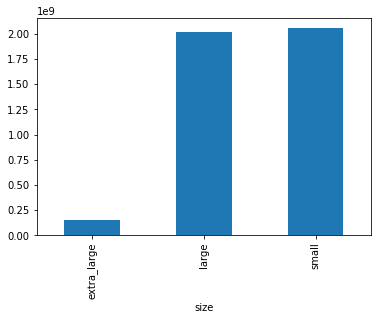

In [58]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()
nb_sold_by_size

# # Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

## Changes in sales over time
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

`pandas` has been imported as `pd`, and `avocados` is available.

**Instructions**
+ Get the total number of avocados sold on each date. *The DataFrame has two rows for each date—one for organic, and one for conventional.*  Save this as `nb_sold_by_date`.
+ Create a line plot of the number of avocados sold.
+ Show the plot.

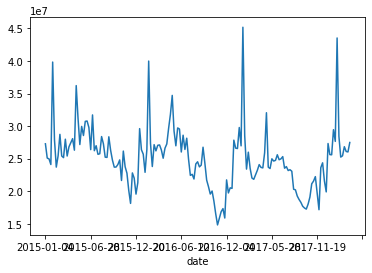

In [59]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

## Avocado supply and demand
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

`matplotlib.pyplot` has been imported as `plt`, `pandas` has been imported as `pd`, and `avocados` is available.

**Instructions**
+ Create a scatter plot with `nb_sold` on the `x-axis` and `avg_price` on the `y-axis`. Title it `"Number of avocados sold vs. average price"`.
+ Show the plot.

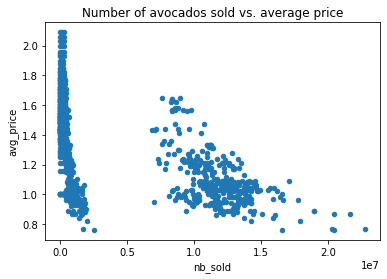

In [63]:
# # Scatter plot of avg_price vs. nb_sold with title
# plt.scatter(x=avocados["nb_sold"],y=avocados["avg_price"])

# plt.xlabel("Number of avocados sol")
# plt.ylabel("average price")
# plt.title("Number of avocados sold vs. average price")

# # Show the plot
# plt.show()

# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

Subset avocados for the conventional type, and the average price column. Create a histogram.
Create a histogram of avg_price for organic type avocados.
Add a legend to your plot, with the names "conventional" and "organic".
Show your plot.

Subset rows using avocados["type"] == "conventional".
Remember to select the avg_price column after subsetting and before plotting.
Call .hist() to draw a histogram.
Your plot won't appear until you display it using a function from plt

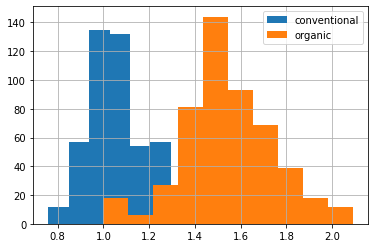

In [64]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

## Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

pandas has been imported as pd and avocados_2016, a subset of avocados that contains only sales from 2016, is available.

**Instructions**
+ Print a DataFrame that shows whether each value in avocados_2016 is missing or not.
+ Print a summary that shows whether any value in each column is missing or not.
+ Create a bar plot of the total number of missing values in each column.

In [ ]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados.isna())

# Check each column for missing values
print(avocados.isna().any())

# Bar plot of missing values by variable
avocados.isna().sum().plot(kind="bar")

# Show plot
plt.show()

# Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

pandas has been imported as pd and avocados_2016 is available.

**Instructions**
+ Remove the rows of avocados_2016 that contain missing values and store the remaining rows in avocados_complete.
+ Verify that all missing values have been removed from avocados_complete. Calculate each column that has NAs and print.

In [ ]:
# Remove rows with missing values
avocados_complete = avocados.dropna()

# Check if any columns contain missing values
print(avocados_complete)

## Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

dogs[["height_cm", "weight_kg"]].hist()
pandas has been imported as pd and matplotlib.pyplot has been imported as plt. The avocados_2016 dataset is available.

+ A list has been created, cols_with_missing, containing the names of columns with missing values: "small_sold", "large_sold", and "xl_sold".
+ Create a histogram of those columns.
+ Show the plot.

In [ ]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

In [67]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

## CSV to DataFrame
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

pandas is imported for you as pd. "airline_bumping.csv" is in your working directory.

**Instructions 1/4**
+ Read the CSV file "airline_bumping.csv" and store it as a DataFrame called airline_bumping.
+ Print the first few rows of airline_bumping.

+ For each airline group, select the nb_bumped, and total_passengers columns, and calculate the sum (for both years). Store this as airline_totals

In [ ]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("airline_bumping.csv")

# Take a look at the DataFrame
print(____)